# Survivalibility on Mt. Everest

## Programming for Data Analysis Project 1

## Author: David Higgins - G00411302

"Getting to the top is optional. Getting down is mandatory."

\- Ed Viesturs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We first import the Mt. Everest Ascent dataset to understand what information is available for mountaineers and to get an idea of the shape of that data.

In [2]:
df = pd.read_csv("Mt_Everest_Ascent_Data.csv")
df.head()

,Peak,Name,Year,Season,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
0,EVER,Edmund Percival Hillary,1953,Spr,29-May,11:30,New Zealand,M,33,Y,.,Nepal
1,EVER,Tenzing Norgay,1953,Spr,29-May,11:30,India,M,39,Y,.,Nepal
2,EVER,Hans-Rudolf Von Gunten,1956,Spr,24-May,11:00,Switzerland,M,27,Y,.,Nepal
3,EVER,Juerg P. Marmet,1956,Spr,23-May,14:00,Switzerland,M,28,Y,.,Nepal
4,EVER,Ernst Schmied,1956,Spr,23-May,14:00,Switzerland,M,31,Y,.,Nepal


We can create a Data Series containing just the age values. It's then possible to use the describe() method to find out the mean and standard deviation of the ages of summitters.

In [3]:
ages = df.loc[:,'Age']
ages.describe()

count    10010.000000
mean        35.293906
std          9.314089
min         13.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         80.000000
Name: Age, dtype: float64

Plotting a histogram of the age Data Series gives us an idea of the shape of the distribution. This is often the best indicator of what distribution is appropriate when generating synthetic data.

(array([ 151., 1629., 2943., 2221., 1825.,  832.,  296.,   93.,   17.,
           3.]),
 array([13. , 19.7, 26.4, 33.1, 39.8, 46.5, 53.2, 59.9, 66.6, 73.3, 80. ]),
 <BarContainer object of 10 artists>)

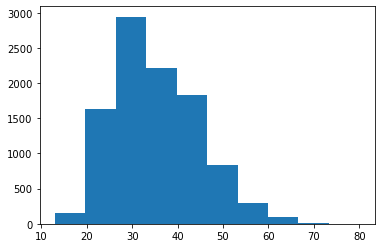

In [4]:
plt.hist(ages, bins=10)

This histogram looks relatively normally distributed. We can try generating a dataset using the mean and standard deviation of the ages Data Series.

[33.96539431 34.33886514 28.51129907 32.41607189 39.91276366 31.18760828
 48.95120956 33.58900339 47.86321465 34.06128992 25.02610941 48.25508701
 39.7582577  44.18233688 25.10524144 37.12551212 26.05426237 60.54084294
 38.61574211 33.29594599 34.00781923 47.91745065 29.39059049 23.55744856
 49.58106861 51.25552015 38.06699508 27.2261602  42.09091151 32.62108566
 30.36484751 27.04673451 29.59002299 34.38260976 45.38199803 39.8891444
 28.04173058 53.70244096 17.99356458 43.37589167 26.28111135 22.16602153
 41.85232471 40.2925051  38.09739506 28.5821198  32.32941211 34.86225765
 35.23726975 18.19111605 40.09153618 42.81602775 31.31583356 38.48906313
 34.13568903 25.76663177 38.05513095 29.34091197 35.29090763 32.7615683
 30.34353949 34.95887792 31.9518527  38.90545251 45.83723629 44.87037328
 29.51519676 23.30535795 39.98613292 37.09173558 25.89674049 50.52661399
 42.10628801 39.65951731 30.13742521 24.0884692  30.92706703 34.3104384
 15.17237088 33.12366483 24.58823725 36.21708258 30.72

(array([ 5., 10., 32., 39., 44., 27., 22., 15.,  5.,  1.]),
 array([14.21448925, 18.84712461, 23.47975998, 28.11239535, 32.74503072,
        37.37766609, 42.01030146, 46.64293683, 51.2755722 , 55.90820757,
        60.54084294]),
 <BarContainer object of 10 artists>)

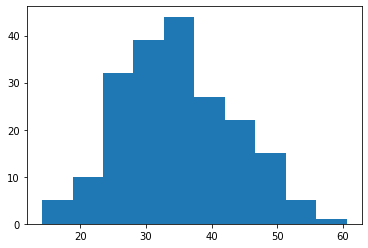

In [5]:
rng = np.random.default_rng()
vals = rng.normal(loc=ages.mean(), scale=ages.std(), size=200)
print(vals)
plt.hist(vals, bins=10)

This appears to be a pretty close approximation of the age Data Series so we will use the variable vals to synthesise age data. Next we consider the probability that a summitter climbed without oxygen. 

In [6]:
noOxygen = df.loc[df.loc[:,'Oxy'] == 'No']
noOxygen.describe()

,Year,Age
count,213.000000,213.000000
mean,2000.680751,35.394366
std,10.407792,6.350187
min,1978.000000,20.000000
25%,1993.000000,31.000000
50%,2001.000000,35.000000
75%,2010.000000,40.000000
max,2019.000000,55.000000


In [7]:
minNoOxAge = noOxygen.Age.mean() - noOxygen.Age.std()*3
maxNoOxAge = noOxygen.Age.mean() + noOxygen.Age.std()*3

print('Minimum age for no oxygen attempt is {} and maximum age is {}.'.format(round(minNoOxAge,1), round(maxNoOxAge,2)))

Minimum age for no oxygen attempt is 16.3 and maximum age is 54.44.


A recent [experiment](https://abcnews.go.com/Health/story?id=2955209&page=1) at Everest Base Camp and the [successful ascent](https://www.nytimes.com/2010/05/20/sports/20climber.html) of a 13 year old show the controversy around the ethics of minors at high altitude.

In [8]:
noOxPotential = df.loc[df.loc[:,'Age'] >= 18].Age.count() + df.loc[df.loc[:,'Age'] <= 18].Age.count()
noOxPotential

10054

We can look at the historical data to get an idea of the probability that a climber will not use oxygen in their attempt. We can count the number of climbers in total who have used oxygen and divide it by the total number of summitters in the appropriate age range determined above.

In [9]:
noOxProbability = noOxygen.Age.count() / noOxPotential
noOxProbability

0.021185597772031033

In [10]:
synNoOx = rng.binomial(1, noOxProbability)
synNoOx

0

Calculate the probabilities of climbing in each season.

In [16]:
sprCount = df.loc[df.loc[:,'Season'] == 'Spr'].Season.count()
sumCount = df.loc[df.loc[:,'Season'] == 'Sum'].Season.count()
autCount = df.loc[df.loc[:,'Season'] == 'Aut'].Season.count()
winCount = df.loc[df.loc[:,'Season'] == 'Win'].Season.count()

sprProb = sprCount / df.Season.count()
sumProb = sumCount / df.Season.count()
autProb = autCount / df.Season.count()
winProb = winCount / df.Season.count()

print(sprProb, sumProb, autProb, winProb)

0.9692307692307692 0.0008991008991008991 0.028371628371628373 0.0014985014985014985


Calculate the probabilities of surviving for summitting in each season with and without oxygen.

In [39]:
seas = ['Spr', 'Sum', 'Aut', 'Win']

for i in seas:
    iNoOxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'No')].Season.count(),2)
    print('The historical probability of death after summitting when climbing without oxygen in {} is {}'.format(i,iNoOxDeathProb))
    iOxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'Y')].Season.count(),2)
    print('The historical probability of death after summitting when climbing with oxygen in {} is {}'.format(i,iOxDeathProb))

The historical probability of death after summitting when climbing without oxygen in Spr is 0.06
The historical probability of death after summitting when climbing with oxygen in Spr is 0.01
The historical probability of death after summitting when climbing without oxygen in Sum is 0.0
The historical probability of death after summitting when climbing with oxygen in Sum is 0.0
The historical probability of death after summitting when climbing without oxygen in Aut is 0.13
The historical probability of death after summitting when climbing with oxygen in Aut is 0.02
The historical probability of death after summitting when climbing without oxygen in Win is 0.0
The historical probability of death after summitting when climbing with oxygen in Win is 0.07


In [23]:
sprNoOxDeathProb = df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count()
sprNoOxDeathProb

10